<a href="https://colab.research.google.com/github/Kunaldahiya2907/Kunal-Dahiya-25pgdm0034/blob/main/quiz_amazon_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-e2f6ca4c0c48>:15: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')
<ipython-input-2-e2f6ca4c0c48>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="coolwarm")


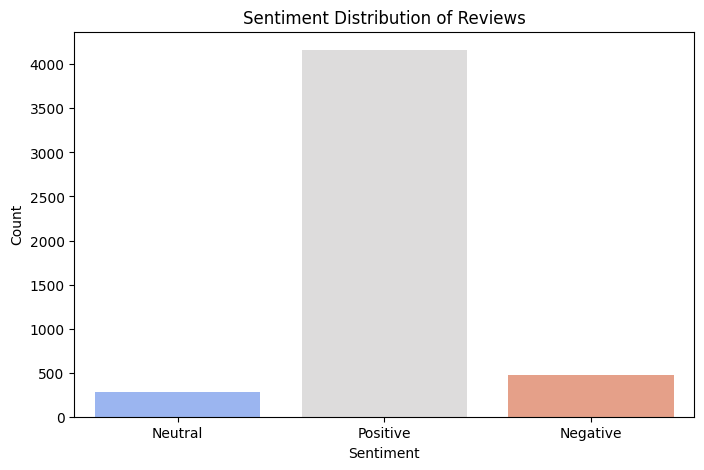

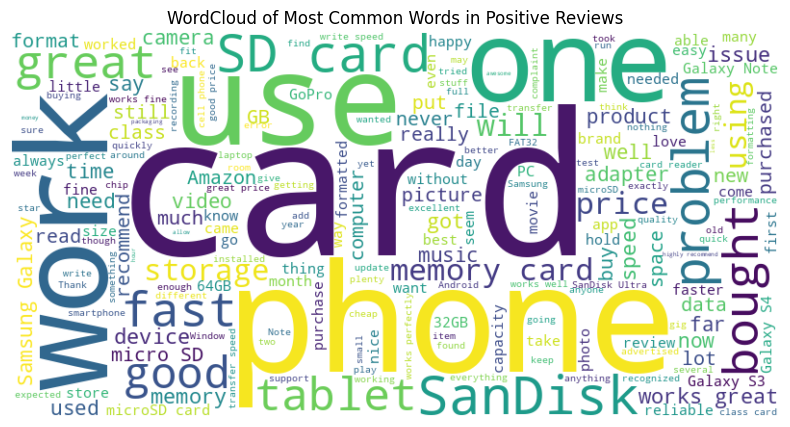

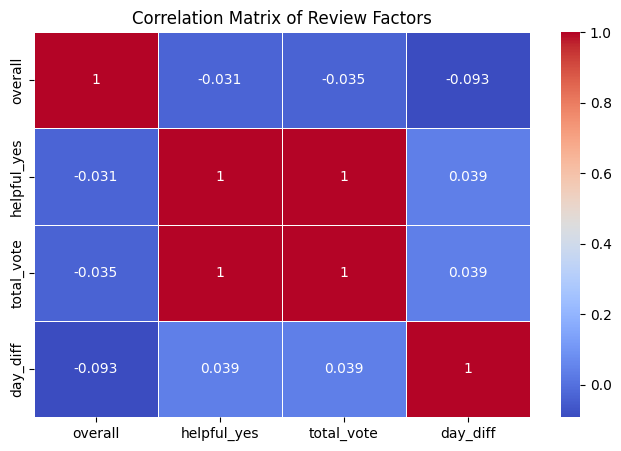

Top 10 Most Important Words in Reviews:
       Word     Score
2      card  0.208817
19    works  0.127515
7     great  0.116106
10    phone  0.113717
9    memory  0.102435
13  sandisk  0.091131
18      use  0.090612
14       sd  0.082979
4      fast  0.082836
6      good  0.082027


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "/content/amazon_review.csv"  # Update with correct file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert date column to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')

# Sentiment Analysis using TextBlob
df['polarity'] = df['reviewText'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Plot Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# WordCloud of Most Frequent Words in Positive Reviews
positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['reviewText'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Most Common Words in Positive Reviews")
plt.show()

# Most Important Factor Analysis: Correlation Heatmap
correlation_matrix = df[['overall', 'helpful_yes', 'total_vote', 'day_diff']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Review Factors")
plt.show()

# TF-IDF Analysis for Most Important Words
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf.fit_transform(df['reviewText'].astype(str))
feature_names = tfidf.get_feature_names_out()
word_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()

# Display top 10 words based on TF-IDF score
important_words = pd.DataFrame({'Word': feature_names, 'Score': word_scores})
important_words = important_words.sort_values(by='Score', ascending=False).head(10)
print("Top 10 Most Important Words in Reviews:")
print(important_words)
